Projet 5 - Segmentez des clients d'un site e-commerce - Prediction 1
# 01. Initialisation
(Tout ce qui commence par 0 c'était mon premier essai en gardant tout le tableau. Je me suis vite rendu compte que c'est trop volumineux pour le clustering. Je suis donc retourné dans mon notebook de nettoyage pour sortir un dfs_3, dont je me sers à partir du 1., pas du 01.)

>>-
## 011. Package imports

In [1]:
import numpy as np              # fast thus always used
import pandas as pd             # fast
pd.set_option("display.max_rows", 20, "display.max_columns", None)
import matplotlib.pyplot as plt # slow: 233 ns
import seaborn as sns           # SLOW BUT: 80.4 ns
cmaps = ['vlag', 'twilight_shifted', 'RdBu_r', 'coolwarm', 'seismic', 'rainbow', 'Greys_r']
import re
import my
import math
import timeit
from scipy import interpolate   # FAST BUT: 319 ns ± 2.64 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
#  %timeit import geopandas     # SLOW 
#import os
#import sys
from IPython.display import clear_output
import warnings

>>-
## 012. Data imports

In [2]:
df = pd.read_csv('dfs_2.csv') #, sep='\t')
try:
    df = df.drop('Unnamed: 0', axis=1)
    print("C'est bon j'ai supprimé la colonne 'Unnamed: 0' qui ne devrait pas exister.")
except:
    print("Y'avait pas de colonne 'Unnamed: 0'")

Y'avait pas de colonne 'Unnamed: 0'


>-
# 02. Classifications

>>-
## 02.1. Initialisation

In [3]:
from sklearn.cluster import dbscan, DBSCAN
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [4]:
X = pd.DataFrame()
scalers = [MinMaxScaler(), RobustScaler(), StandardScaler()]

In [7]:
cols_num = ["R","F","M"]
X[cols_num] = scalers[0].fit_transform(df[cols_num])

In [8]:
X.head(2)

,R,F,M
0,0.207382,0.0,0.521091
1,0.211250,0.0,0.350636


In [20]:
model = dbscan(eps=.3,min_samples=10)

TypeError: dbscan() missing 1 required positional argument: 'X'

In [12]:
model = DBSCAN(eps=.3,min_samples=10)

In [11]:
# TROP DIFFICILE POUR LE PC ! X est trop grand !
#db = DBSCAN(eps=.3,min_samples=10).fit(X)
#db = model.fit(X)

In [13]:
XX = X.loc[:30,:]
XX.head(2)

,R,F,M
0,0.207382,0.0,0.521091
1,0.211250,0.0,0.350636


In [14]:
db = model.fit(XX)

In [15]:
db.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [16]:
db.core_sample_indices_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
      dtype=int64)

In [17]:
np.zeros_like(db.labels_, dtype=bool)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [18]:
set(db.labels_)

{0}

In [19]:
model = DBSCAN(eps=.3,min_samples=3)
db = model.fit(XX)
db.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [20]:
model = DBSCAN(eps=.3,min_samples=1)
db = model.fit(XX)
db.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [21]:
model = DBSCAN(eps=.3,min_samples=2)
db = model.fit(XX)
db.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [22]:
model = DBSCAN(eps=.1,min_samples=2)
db = model.fit(XX)
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0, -1, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [23]:
model = DBSCAN(eps=1,min_samples=2)
db = model.fit(XX)
db.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
model = DBSCAN(eps=10,min_samples=2)
db = model.fit(XX)
db.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [25]:
model = DBSCAN(eps=5,min_samples=5)
db = model.fit(XX)
db.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# 1. Initialisation

>>-
## 11. Package imports

In [1]:
import numpy as np              # fast thus always used
import pandas as pd             # fast
pd.set_option("display.max_rows", 20, "display.max_columns", None)
import matplotlib.pyplot as plt # slow: 233 ns
import seaborn as sns           # SLOW BUT: 80.4 ns
cmaps = ['vlag', 'twilight_shifted', 'RdBu_r', 'coolwarm', 'seismic', 'rainbow', 'Greys_r']
import re
import my
import math
import timeit
from scipy import interpolate   # FAST BUT: 319 ns ± 2.64 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
#  %timeit import geopandas     # SLOW 
#import os
#import sys
from IPython.display import clear_output
import warnings

>>-
## 12. Data imports

In [2]:
df = pd.read_csv('dfs_2.csv') #, sep='\t')
try:
    df = df.drop('Unnamed: 0', axis=1)
    print("C'est bon j'ai supprimé la colonne 'Unnamed: 0' qui ne devrait pas exister.")
except:
    print("Y'avait pas de colonne 'Unnamed: 0'")

C'est bon j'ai supprimé la colonne 'Unnamed: 0' qui ne devrait pas exister.


>-
# 2. Classifications

>>-
## 2.1. Initialisation

In [3]:
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder

In [4]:
X = pd.DataFrame()
scalers = [MinMaxScaler(), RobustScaler(), StandardScaler()]

In [5]:
cols_num = ["R","F","M"]
X[cols_num] = scalers[0].fit_transform(df[cols_num])

In [6]:
X.head(2)

,R,F,M
0,0.207382,0.0,0.521091
1,0.211250,0.0,0.350636


In [7]:
cmaps = ['vlag', 'twilight_shifted', 'RdBu_r', 'coolwarm', 'seismic', 'rainbow']

In [36]:
def ploot(stRFM, azim=120, elev=30):
    '''
    ploot prend en entrée une string de length 6 alternant un signe avec une lettre dans rfm.  
    Cela permet de choisir la disposition des axes pour le plot.  
    
    ax.elev = 30
    ax.azim = 120  # xyz default view
    
    ax.elev = 0
    ax.azim = 270  # xz view
    
    ax.elev = 0
    ax.azim = 0    # yz view
    
    ax.elev = 0
    ax.azim = -90  # xy view
    '''
    strm = str(model).split('(')[0]
    stRFM = stRFM.upper()
    fig = plt.figure(figsize=(20, 6))
    ax = fig.add_subplot(projection='3d')
    #ax.scatter(X.R, X.M, X.F, c=y_pred, cmap="hsv")
    diRFM = []
    for i,j in enumerate([0,2,4]):
        diRFM.append(".5" + stRFM[j] + "(-.5) " + stRFM[j] + " 1*X[stRFM[" + str(j + 1) + "]]")
    ax.scatter(eval(diRFM[0]), eval(diRFM[1]), eval(diRFM[2]), c=y_pred, cmap="hsv")
    plt.title(strm)
    lbl = [0, 0, 0]
    for i,j in enumerate([1,3,5]):
        if stRFM[j] == "R":
            lbl[i] = "Recency"
        elif stRFM[j] == "F":
            lbl[i] = "Frequency"
        else:
            lbl[i] = "Monetary"
        if stRFM[j-1] == "-":
                lbl[i] = "1 - " + lbl[i]
    plt.xlabel(lbl[0],fontsize=16)
    plt.xticks(fontsize=14)
    plt.ylabel(lbl[1],fontsize=16)
    plt.yticks(fontsize=14)
    ax.set_zlabel(lbl[2],fontsize=16)
    #ax.set_zticks(fontsize=14)
    ax.elev = elev
    ax.azim = azim
    plt.legend

In [22]:
X[X.F != 0]

,R,F,M
19,0.147917,0.143111,0.459407
33,0.084551,0.143111,0.577766
55,0.398619,0.143111,0.616908
73,0.624794,0.143111,0.494355
106,0.357656,0.143111,0.616760
...,...,...,...
95942,0.269633,0.143111,0.412997
95951,0.763650,0.143111,0.482538
95953,0.258006,0.143111,0.475281
96049,0.728529,0.143111,0.461631


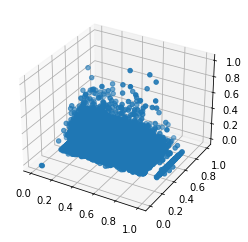

In [23]:
fig = plt.figure(figsize=(20, 4))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.R, X.M, X.F)

<function matplotlib.pyplot.legend(*args, **kwargs)>

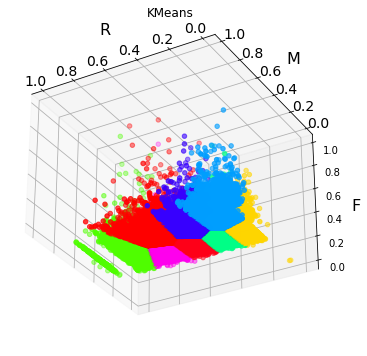

In [45]:
model = KMeans(n_clusters=8, init="k-means++")
model = model.fit(X)
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.R,X.M,X.F, c=model.labels_, cmap="hsv")
plt.title("KMeans")
plt.xlabel("R",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("M",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("F",fontsize=16)
#ax.set_zticks(fontsize=14)
ax.elev = -30
ax.azim = 120
plt.legend


In [50]:
model.cluster_centers_

array([[0.16809815, 0.01828547, 0.58670226],
       [0.42569081, 0.0065283 , 0.4488488 ],
       [0.12253537, 0.00513382, 0.44874623],
       [0.35188893, 0.01549295, 0.57582314],
       [0.7499993 , 0.00992691, 0.4995017 ],
       [0.55504829, 0.01903284, 0.59088907],
       [0.26851957, 0.00561081, 0.44375773],
       [0.59684364, 0.00687394, 0.43971116]])

TypeError: scatter() missing 1 required positional argument: 'ys'

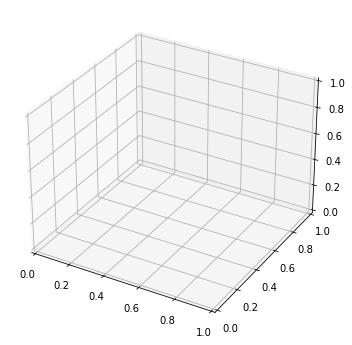

In [49]:

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(model.cluster_centers_, c=model.labels_, cmap="hsv")

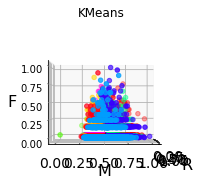

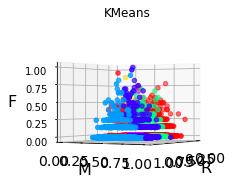

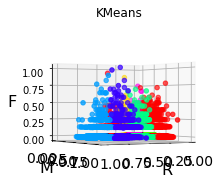

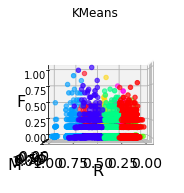

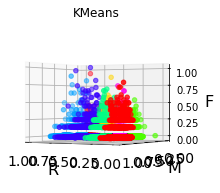

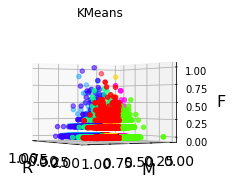

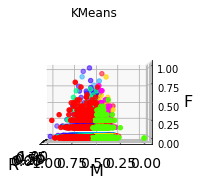

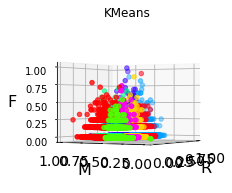

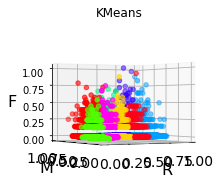

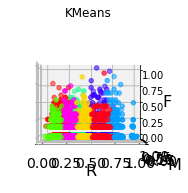

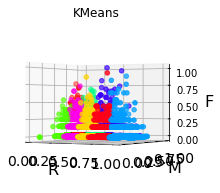

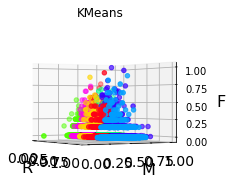

In [47]:
model = KMeans(n_clusters=8, init="k-means++")
model = model.fit(X)
for i in [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]:
    fig = plt.figure(figsize=(20, 3))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X.R,X.M,X.F, c=model.labels_, cmap="hsv")
    plt.title("KMeans")
    plt.xlabel("R",fontsize=16)
    plt.xticks(fontsize=14)
    plt.ylabel("M",fontsize=16)
    plt.yticks(fontsize=14)
    ax.set_zlabel("F",fontsize=16)
    #ax.set_zticks(fontsize=14)
    ax.elev = 0
    ax.azim = i
    plt.legend


In [24]:
model = KMeans(n_clusters=5, init="k-means++")
y_pred = model.fit_predict(X)
#db = model.fit(X)
#set(db.labels_)

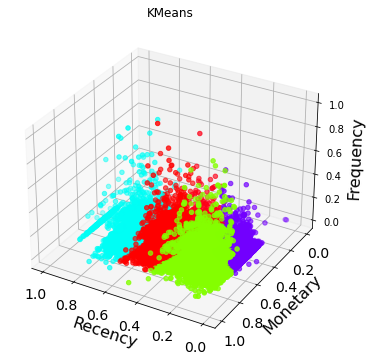

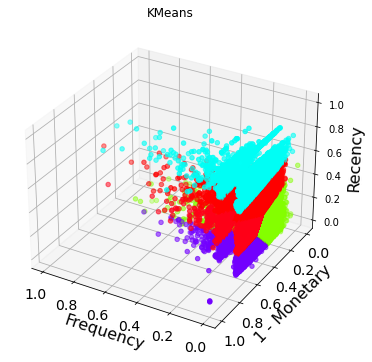

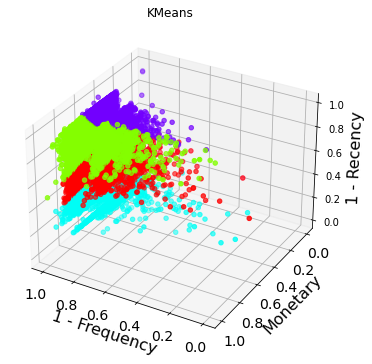

In [37]:
ploot("+r+m+f")
ploot("+f-m+r")
ploot("-f+m-r")

In [38]:
model = KMeans(n_clusters=8, init="k-means++")
y_pred = model.fit_predict(X)
#db = model.fit(X)
#set(db.labels_)

In [39]:
#from mpl_toolkits import mplot3d

In [40]:
#%matplotlib notebook

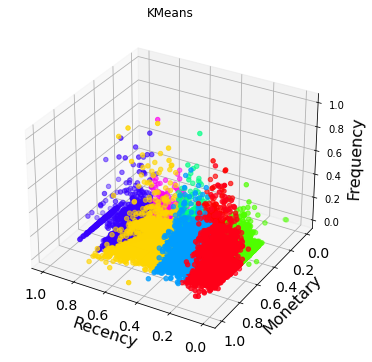

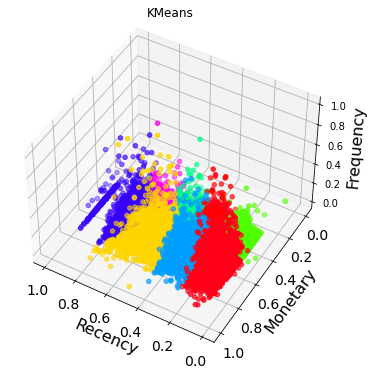

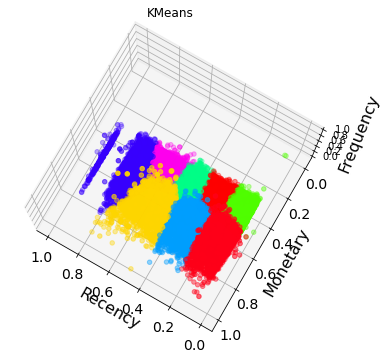

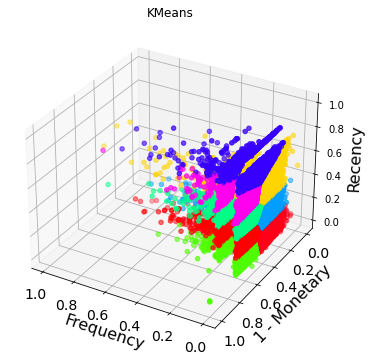

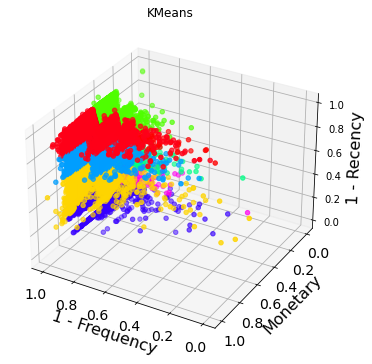

In [43]:
ploot("+r+m+f")
ploot("+r+m+f",120,45)
ploot("+r+m+f",120,80)
ploot("+f-m+r")
ploot("-f+m-r")


J'ai l'impression que ce clustering KMeans se fait uniquement dans le plan (R,M) et ne tient jamais compte des valeurs de F.

In [ ]:
X = X.sample(n=1000, weights=None, random_state=1) #frac=.1, weights="F", random_state=1)

In [ ]:
model = DBSCAN(eps=.3,min_samples=10)

In [8]:
#db = DBSCAN(eps=.3,min_samples=10).fit(X)
db = model.fit(X)

In [9]:
db.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [10]:
db.core_sample_indices_

array([   0,    1,    2, ..., 5726, 5727, 5728], dtype=int64)

In [11]:
np.zeros_like(db.labels_, dtype=bool)

array([False, False, False, ..., False, False, False])

In [12]:
set(db.labels_)

{0}

In [13]:
model = DBSCAN(eps=.3,min_samples=3)
db = model.fit(X)
set(db.labels_)

{0}

In [14]:
model = DBSCAN(eps=.3,min_samples=1)
db = model.fit(X)
set(db.labels_)

{0}

In [15]:
model = DBSCAN(eps=.3,min_samples=2)
db = model.fit(X)
set(db.labels_)

{0}

In [30]:
model = DBSCAN(eps=.1,min_samples=2)
y_pred = model.fit_predict(X)
db = model.fit(X)
set(db.labels_)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8}

In [28]:
X

,R,F,M
0,0.152814,0.0,0.296091
1,0.086839,0.0,0.461721
2,0.413836,0.0,0.516496
3,0.649322,0.0,0.344997
4,0.371187,0.0,0.516289
...,...,...,...
5724,0.279540,0.0,0.231145
5725,0.793894,0.0,0.328460
5726,0.267435,0.0,0.318304
5727,0.757328,0.0,0.299203


<function matplotlib.pyplot.legend(*args, **kwargs)>

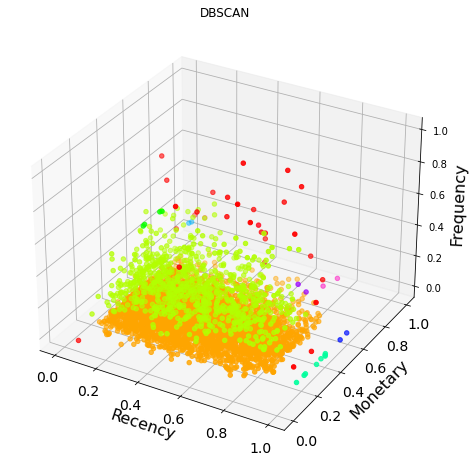

In [67]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.R, X.M, X.F, c=y_pred, cmap="hsv")
plt.title("DBSCAN")
plt.xlabel("Recency",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Monetary",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("Frequency",fontsize=16)
#ax.set_zticks(fontsize=14)
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

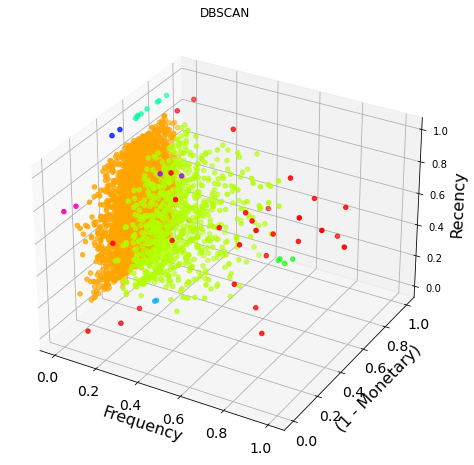

In [66]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.F, (1-X.M), X.R, c=y_pred, cmap="hsv")
plt.title("DBSCAN")
plt.xlabel("Frequency",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("(1 - Monetary)",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("Recency",fontsize=16)
#ax.set_zticks(fontsize=14)
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

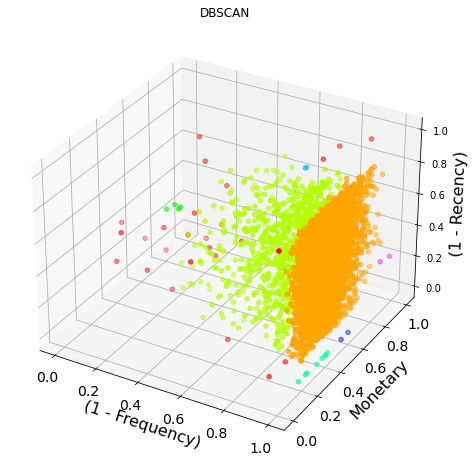

In [68]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter((1-X.F), X.M, (1-X.R), c=y_pred, cmap="hsv")
plt.title("DBSCAN")
plt.xlabel("(1 - Frequency)",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Monetary",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("(1 - Recency)",fontsize=16)
#ax.set_zticks(fontsize=14)
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

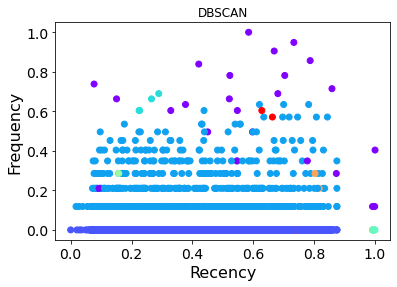

In [49]:
plt.scatter(X.R, X.F, c=y_pred, cmap=cmaps[5])
plt.title("DBSCAN")
plt.xlabel("Recency",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Frequency",fontsize=16)
plt.yticks(fontsize=14)
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

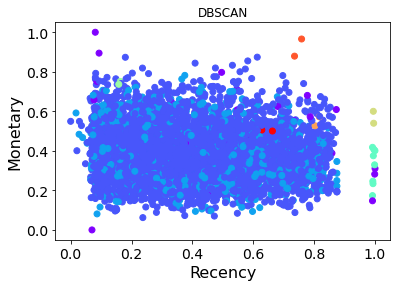

In [50]:
plt.scatter(X.R, X.M, c=y_pred, cmap=cmaps[5])
plt.title("DBSCAN")
plt.xlabel("Recency",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Monetary",fontsize=16)
plt.yticks(fontsize=14)
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

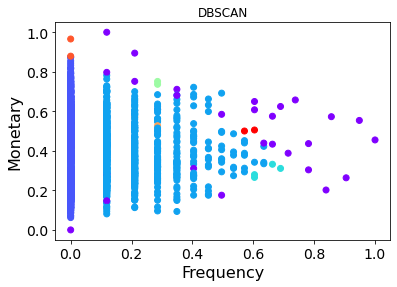

In [51]:
plt.scatter(X.F, X.M, c=y_pred, cmap=cmaps[5])
plt.title("DBSCAN")
plt.xlabel("Frequency",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Monetary",fontsize=16)
plt.yticks(fontsize=14)
plt.legend

In [ ]:
plot les db.label_ == 1 par exemple (voir la syntaxe)

In [17]:
model = DBSCAN(eps=1,min_samples=2)
db = model.fit(X)
set(db.labels_)

{0}

In [18]:
model = DBSCAN(eps=10,min_samples=2)
db = model.fit(X)
set(db.labels_)

{0}

In [19]:
model = DBSCAN(eps=5,min_samples=5)
db = model.fit(X)
set(db.labels_)

{0}

In [71]:
model = KMeans(n_clusters=5, init="k-means++")
y_pred = model.fit_predict(X)
db = model.fit(X)
set(db.labels_)

{0, 1, 2, 3, 4}

<function matplotlib.pyplot.legend(*args, **kwargs)>

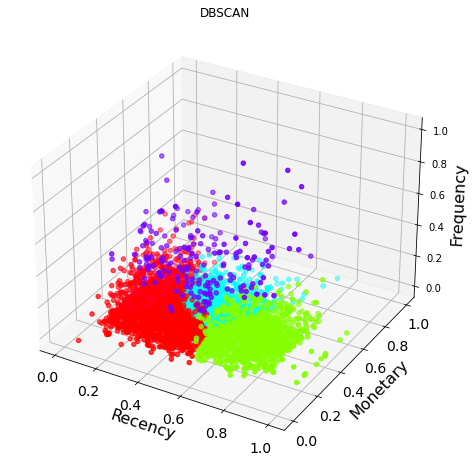

In [72]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.R, X.M, X.F, c=y_pred, cmap="hsv")
plt.title("DBSCAN")
plt.xlabel("Recency",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Monetary",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("Frequency",fontsize=16)
#ax.set_zticks(fontsize=14)
plt.legend

Pas terrible. Il a juste mis un centroïde à chaque coin.

In [73]:
model = KMeans(n_clusters=3, init="k-means++")
y_pred = model.fit_predict(X)
db = model.fit(X)
set(db.labels_)

{0, 1, 2}

<function matplotlib.pyplot.legend(*args, **kwargs)>

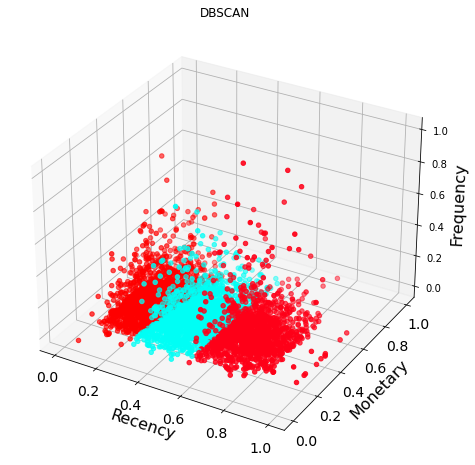

In [74]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.R, X.M, X.F, c=y_pred, cmap="hsv")
plt.title("DBSCAN")
plt.xlabel("Recency",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Monetary",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("Frequency",fontsize=16)
#ax.set_zticks(fontsize=14)
plt.legend

Pas terrible. Il a juste aligné 3 centroïdes sur l'axe Monetary=.5.

In [75]:
model = AgglomerativeClustering(n_clusters=5)
y_pred = model.fit_predict(X)
db = model.fit(X)
set(db.labels_)

{0, 1, 2, 3, 4}

<function matplotlib.pyplot.legend(*args, **kwargs)>

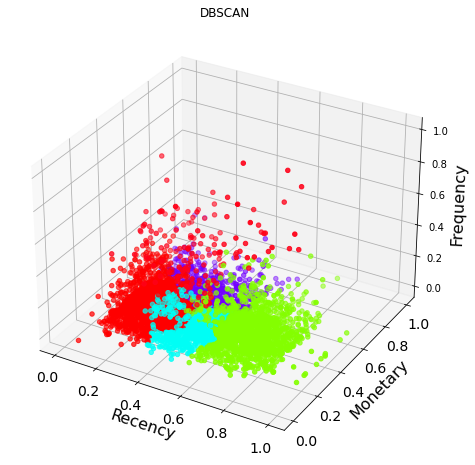

In [76]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.R, X.M, X.F, c=y_pred, cmap="hsv")
plt.title("DBSCAN")
plt.xlabel("Recency",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Monetary",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("Frequency",fontsize=16)
#ax.set_zticks(fontsize=14)
plt.legend

Même problème qu'avec KMeans.

In [77]:
model = AgglomerativeClustering(n_clusters=3)
y_pred = model.fit_predict(X)
db = model.fit(X)
set(db.labels_)

{0, 1, 2}

<function matplotlib.pyplot.legend(*args, **kwargs)>

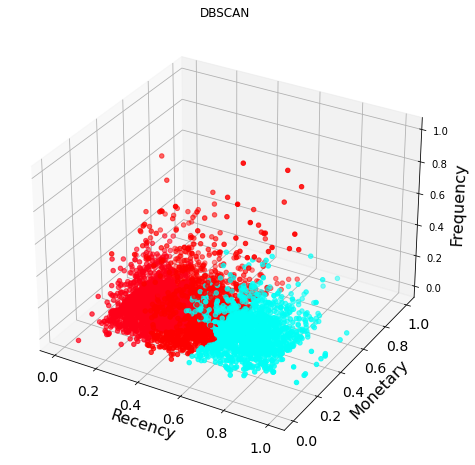

In [78]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.R, X.M, X.F, c=y_pred, cmap="hsv")
plt.title("DBSCAN")
plt.xlabel("Recency",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Monetary",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("Frequency",fontsize=16)
#ax.set_zticks(fontsize=14)
plt.legend

Même problème qu'avec KMeans.

In [ ]:
r=

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [5]:
def pipeline_t(i, j, k):
    ppln_num = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', j)])
    ppln_cat = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('encoder', i)])
    preprocessor = ColumnTransformer(transformers=[('num', ppln_num, cols_num), ('cat', ppln_cat, cols_cat)])
    k_lowercase = str(k)
    k_lowercase = k_lowercase.lower()[:-2]
    model = Pipeline(steps=[('preprocessor', preprocessor), (k_lowercase, k)])
    return model

In [24]:
dfpar = pd.DataFrame(columns=['estimator','param_names','param_nums'])
#dfpar.loc[0] = [kmeans()]
#dfpar.loc[1] = [dbscan()]
dfpar.loc[0] = [DBSCAN(), ['dbscan__eps','dbscan__min_samples'], [[.1, .3, 1],[3, 10]]]
#dfpar.loc[2] = [hierarchy()]
#dfpar.loc[1] = [Lasso(), ['lasso__alpha'], [pt110]]
#dfpar.loc[2] = [DummyRegressor(), ['dummyregressor__strategy'], [["mean"],["median"]]]
dfpar

,estimator,param_names,param_nums
0,DBSCAN(),"[dbscan__eps, dbscan__min_samples]","[[0.1, 0.3, 1], [3, 10]]"


In [25]:
encoders = [OneHotEncoder(sparse=False,handle_unknown='ignore')]
scalers = [MinMaxScaler(), RobustScaler(), StandardScaler()]
estimators = list(dfpar['estimator'])

In [28]:
warnings.filterwarnings('ignore')
dfscores = pd.DataFrame(columns=['Encoder','Scaler','Estimator','best score','r2','mae','msqe','time','best_params','best_estimator'])
m = 0
for i in encoders:
    for j in scalers:
        for k_index, k in enumerate(estimators):
            start_time = timeit.default_timer()
            model = pipeline_t(i, j, k)
            #grid = GridSearchCV(model, param_grid=params[k_index], cv=5, scoring='r2')
            #grid.fit(Xtr, ytr)
            #ypred = grid.predict(Xts)
            modelfit = model.fit(X)
            time_passed = timeit.default_timer() - start_time
            cell_pn = dfpar.loc[k_index, 'param_nums']
            param_loops = math.prod([len(cell_pn[i]) for i in range(len(cell_pn))])
            time_1 = time_passed/(param_loops)
            #dfscores.loc[m] = [i, j, k, grid.best_score_, r2_score(yts, ypred), mean_absolute_error(yts, ypred), mean_squared_error(yts, ypred), time_1, grid.best_params_, grid.best_estimator_]
            clear_output()
            print(str(100*m/(len(encoders)*len(scalers)*len(estimators))) + '%')
            m += 1
clear_output()
#display(dfscores)

AttributeError: 'bool' object has no attribute 'transpose'

In [ ]:
r=

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
#ztr, zts = train_test_split(df, test_size=0.2, random_state=5)
X = df.drop(drops, axis=1)
y = df[target1]
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.2, random_state=5)

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder
#from sklearn.dummy import 
#from sklearn.linear_model import 
from sklearn import set_config
set_config(display="diagram")
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import shap
shap.initjs()

In [10]:
def pipeline_t(i, j, k):
    ppln_num = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', j)])
    ppln_cat = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('encoder', i)])
    preprocessor = ColumnTransformer(transformers=[('num', ppln_num, cols_num), ('cat', ppln_cat, cols_cat)])
    k_lowercase = str(k)
    k_lowercase = k_lowercase.lower()[:-2]
    model = Pipeline(steps=[('preprocessor', preprocessor), (k_lowercase, k)])
    return model

In [11]:
pt110 = [.1, .3, 1, 3, 10]
dfpar = pd.DataFrame(columns=['estimator','param_names','param_nums'])
dfpar.loc[0] = [kmeans()]
dfpar.loc[1] = [dbscan()]
dfpar.loc[2] = [hierarchy()]
#dfpar.loc[0] = [Ridge(), ['ridge__alpha'], [pt110]]
#dfpar.loc[1] = [Lasso(), ['lasso__alpha'], [pt110]]
#dfpar.loc[2] = [DummyRegressor(), ['dummyregressor__strategy'], [["mean"],["median"]]]
#dfpar.loc[3] = [LinearRegression(), ['linearregression__fit_intercept'], [[True]]]
#dfpar.loc[4] = [ElasticNetCV(), ['elasticnetcv__l1_ratio','elasticnetcv__n_alphas'], [[.1, .3, 1],[30, 100]]]
dfpar

,estimator,param_names,param_nums
0,Ridge(),[ridge__alpha],"[[0.1, 0.3, 1, 3, 10]]"
1,Lasso(),[lasso__alpha],"[[0.1, 0.3, 1, 3, 10]]"
2,DummyRegressor(),[dummyregressor__strategy],"[[mean], [median]]"
3,LinearRegression(),[linearregression__fit_intercept],[[True]]
4,ElasticNetCV(),"[elasticnetcv__l1_ratio, elasticnetcv__n_alphas]","[[0.1, 0.3, 1], [30, 100]]"


In [12]:
params = [{dfpar.loc[j, 'param_names'][i]: dfpar.loc[j, 'param_nums'][i] for i in range(len(dfpar.loc[j, 'param_names']))} for j in range(dfpar.shape[0])]
params

[{'ridge__alpha': [0.1, 0.3, 1, 3, 10]},
 {'lasso__alpha': [0.1, 0.3, 1, 3, 10]},
 {'dummyregressor__strategy': ['mean']},
 {'linearregression__fit_intercept': [True]},
 {'elasticnetcv__l1_ratio': [0.1, 0.3, 1],
  'elasticnetcv__n_alphas': [30, 100]}]

In [13]:
encoders = [OneHotEncoder(sparse=False,handle_unknown='ignore')]
scalers = [MinMaxScaler(), RobustScaler(), StandardScaler()]
estimators = list(dfpar['estimator'])

>>-
## 2.2. Recherche du meilleur estimateur

In [15]:
warnings.filterwarnings('ignore')
dfscores = pd.DataFrame(columns=['Encoder','Scaler','Estimator','best score','r2','mae','msqe','time','best_params','best_estimator'])
m = 0
for i in encoders:
    for j in scalers:
        for k_index, k in enumerate(estimators):
            start_time = timeit.default_timer()
            model = pipeline_t(i, j, k)
            #grid = GridSearchCV(model, param_grid=params[k_index], cv=5, refit=False
            #                   , scoring={'s_r2':'r2','s_nrmse':'neg_root_mean_squared_error','s_me':'max_error','s_ev':'explained_variance'})
            #grid = GridSearchCV(model, param_grid=params[k_index], cv=5, refit='r2' #refit=True False 'r2'
            #                   , scoring={'s_r2':'r2','s_nrmse':'neg_root_mean_squared_error'}) # Ne fonctionne pas car il considère que je n'ai pas spécifié refit.
            grid = GridSearchCV(model, param_grid=params[k_index], cv=5, scoring='r2')
            grid.fit(Xtr, ytr)
            ypred = grid.predict(Xts)
            time_passed = timeit.default_timer() - start_time
            cell_pn = dfpar.loc[k_index, 'param_nums']
            param_loops = math.prod([len(cell_pn[i]) for i in range(len(cell_pn))])
            time_1 = time_passed/(param_loops)
            dfscores.loc[m] = [i, j, k, grid.best_score_, r2_score(yts, ypred), mean_absolute_error(yts, ypred), mean_squared_error(yts, ypred), time_1, grid.best_params_, grid.best_estimator_]
            clear_output()
            print(str(100*m/(len(encoders)*len(scalers)*len(estimators))) + '%')
            m += 1
clear_output()
display(dfscores)

,Encoder,Scaler,Estimator,best score,r2,mae,msqe,time,best_params,best_estimator
0,OrdinalEncoder(handle_unknown='use_encoded_val...,RobustScaler(),Ridge(),1.279617e-01,-1.670998e+00,4.305065e+01,1.303636e+04,0.074264,{'ridge__alpha': 10},"(ColumnTransformer(transformers=[('num',\n ..."
1,OrdinalEncoder(handle_unknown='use_encoded_val...,RobustScaler(),Lasso(),2.896550e-01,-1.192557e+00,4.271999e+01,1.070123e+04,0.074091,{'lasso__alpha': 10},"(ColumnTransformer(transformers=[('num',\n ..."
2,OrdinalEncoder(handle_unknown='use_encoded_val...,RobustScaler(),DummyRegressor(),-2.075314e-03,-4.763885e-04,4.547045e+01,4.883032e+03,0.088333,{'dummyregressor__strategy': 'mean'},"(ColumnTransformer(transformers=[('num',\n ..."
3,OrdinalEncoder(handle_unknown='use_encoded_val...,RobustScaler(),LinearRegression(),1.182682e-01,-1.674003e+00,4.305699e+01,1.305103e+04,0.094006,{'linearregression__fit_intercept': True},"(ColumnTransformer(transformers=[('num',\n ..."
4,OrdinalEncoder(handle_unknown='use_encoded_val...,RobustScaler(),ElasticNetCV(),-6.414048e-03,-4.763885e-04,4.547045e+01,4.883032e+03,0.190537,"{'elasticnetcv__l1_ratio': 0.1, 'elasticnetcv_...","(ColumnTransformer(transformers=[('num',\n ..."
5,OrdinalEncoder(handle_unknown='use_encoded_val...,StandardScaler(),Ridge(),1.941123e-01,-1.595599e+00,4.318787e+01,1.266835e+04,0.066801,{'ridge__alpha': 10},"(ColumnTransformer(transformers=[('num',\n ..."
6,OrdinalEncoder(handle_unknown='use_encoded_val...,StandardScaler(),Lasso(),3.179812e-01,-1.104182e+00,4.333398e+01,1.026989e+04,0.067612,{'lasso__alpha': 3},"(ColumnTransformer(transformers=[('num',\n ..."
7,OrdinalEncoder(handle_unknown='use_encoded_val...,StandardScaler(),DummyRegressor(),-2.075314e-03,-4.763885e-04,4.547045e+01,4.883032e+03,0.077030,{'dummyregressor__strategy': 'mean'},"(ColumnTransformer(transformers=[('num',\n ..."
8,OrdinalEncoder(handle_unknown='use_encoded_val...,StandardScaler(),LinearRegression(),1.182682e-01,-1.674003e+00,4.305699e+01,1.305103e+04,0.083398,{'linearregression__fit_intercept': True},"(ColumnTransformer(transformers=[('num',\n ..."
9,OrdinalEncoder(handle_unknown='use_encoded_val...,StandardScaler(),ElasticNetCV(),2.581814e-01,-6.315699e-01,4.410558e+01,7.963214e+03,0.183331,"{'elasticnetcv__l1_ratio': 0.3, 'elasticnetcv_...","(ColumnTransformer(transformers=[('num',\n ..."


In [16]:
i, j, k # Me donne la loop en cours, en cas d'erreur.

(OneHotEncoder(handle_unknown='ignore', sparse=False),
 StandardScaler(),
 ElasticNetCV())

In [17]:
index_1 = dfscores[dfscores['best score'] == dfscores['best score'].max()].index[0]
#encoder_1, scaler_1, estimator_1, best_params_1, model = dfscores.loc[index_1,['Encoder','Scaler','Estimator','best_params','best_estimator']]
model_best = dfscores.loc[index_1,'best_estimator']
model_best

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['NumberofFloors',
                                                   'SteamUse(kBtu)',
                                                   'PropertyGFABuilding(s)',
                                                   'PropertyGFAParking',
                                                   'Longitude', 'Latitude',
                                                   'Electricity(kBtu)',
                                                   'YearBuilt',
                                                   'NaturalGas(kBtu)',
                                                   'NumberofBuildings']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['BuildingType',
                                                   'PrimaryPropertyType',
                                                   'ZipCode',
                                                   'CouncilDistrictCode',
                                                   'Neighborhood',
                                                   'LargestPropertyUseType'])])),
                ('elasticnetcv', ElasticNetCV(l1_ratio=0.3, n_alphas=30))])

>-
# 3. Pertinence de l'ENERGYSTARScore

>>-
## 3.1. Suppression des données dont l'ENERGYSTARScore n'est pas renseigné.

In [18]:
display(df.shape)
df = df[~df['ENERGYSTARScore'].isna()]
df = my.resindx(df)

(1666, 19)

Il n'y avait pas de colonne 'level_0' indésirable à supprimer.
Une colonne 'index' indésirable a été supprimée.
(1094, 19)


>>-
## 3.2. Performance du best_estimator_ AVEC la feature ENERGYSTARScore

>>>-
### 3.2.1. Performance

In [19]:
drops = ['SiteEUIWN(kBtu/sf)','GHGEmissionsIntensity']

In [20]:
cols_num = []
with open("cols_num.txt", "r") as f:
    for line in f:
        cols_num.append(line.strip())

In [21]:
X = df.drop(drops, axis=1)
for i in drops:
    cols_num.remove(i)
y = df[target1]
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.2, random_state=5)

Ici je dois absolument reconstruire mon model car sinon il travaillera en ignorant complètement l'ENERGYSTARScore (parce que quand je l'ai fabriqué dans le 2.2 il travaillait sans ENERGYSTARScore).

In [22]:
mb00 = model_best.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder']
mb01 = model_best.named_steps['preprocessor'].transformers_[0][1].named_steps['scaler']
mb1 = model_best[1]
model = pipeline_t(mb00, mb01, mb1)
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['NumberofFloors',
                                                   'SteamUse(kBtu)',
                                                   'PropertyGFABuilding(s)',
                                                   'PropertyGFAParking',
                                                   'Longitude', 'Latitude',
                                                   'Electricity(kBtu)',
                                                   'ENERGYSTARScore',
                                                   'YearBuilt',
                                                   'NaturalGas(kBtu)',
                                                   'NumberofBuildings']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['BuildingType',
                                                   'PrimaryPropertyType',
                                                   'ZipCode',
                                                   'CouncilDistrictCode',
                                                   'Neighborhood',
                                                   'LargestPropertyUseType'])])),
                ('elasticnetcv(l1_ratio=0.3, n_alphas=3',
                 ElasticNetCV(l1_ratio=0.3, n_alphas=30))])

En cliquant sur num dans les deux outputs ci-dessus et ci-dessous on voit que si j'avais travaillé avec model_best ma pipeline aurait ignoré la colonne ENERGYSTARScore pourtant présente dans X, et qu'en travaillant avec model (que je viens pourtant de construire à partir des éléments de model_best) ma pipeline tient correctement compte de l'indicateur ENERGYSTARScore.

In [23]:
model_best

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['NumberofFloors',
                                                   'SteamUse(kBtu)',
                                                   'PropertyGFABuilding(s)',
                                                   'PropertyGFAParking',
                                                   'Longitude', 'Latitude',
                                                   'Electricity(kBtu)',
                                                   'YearBuilt',
                                                   'NaturalGas(kBtu)',
                                                   'NumberofBuildings']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['BuildingType',
                                                   'PrimaryPropertyType',
                                                   'ZipCode',
                                                   'CouncilDistrictCode',
                                                   'Neighborhood',
                                                   'LargestPropertyUseType'])])),
                ('elasticnetcv', ElasticNetCV(l1_ratio=0.3, n_alphas=30))])

In [24]:
model.fit(Xtr, ytr)
ypred = model.predict(Xts)
r2_E, mae_E, mse_E = r2_score(yts, ypred), mean_absolute_error(yts, ypred), mean_squared_error(yts, ypred)

In [25]:
r2_E, mae_E, mse_E

(0.4083660100279496, 24.128123367813092, 3250.1732253809832)

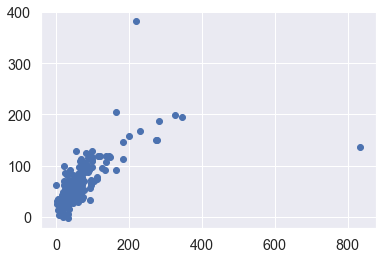

In [26]:
plt.scatter(yts, ypred)

>>>-
### 3.2.2. Comparaison de l'importance de chaque indicateur, avec shap

In [27]:
cols_cat_ohe = model.named_steps['preprocessor'].transformers_[1][1]\
                    .named_steps['encoder'].get_feature_names(cols_cat)

In [28]:
feature_names_2 = np.concatenate((cols_num, cols_cat_ohe),axis=0)

In [29]:
X_mod = model[0].fit_transform(Xtr, ytr)

In [30]:
X_mod = pd.DataFrame(X_mod, index=Xtr.index, columns=feature_names_2)

In [31]:
explainer = shap.Explainer(model[1].predict, X_mod)

In [32]:
shap_values = explainer(X_mod)

Permutation explainer: 876it [00:16, 23.02it/s]                         


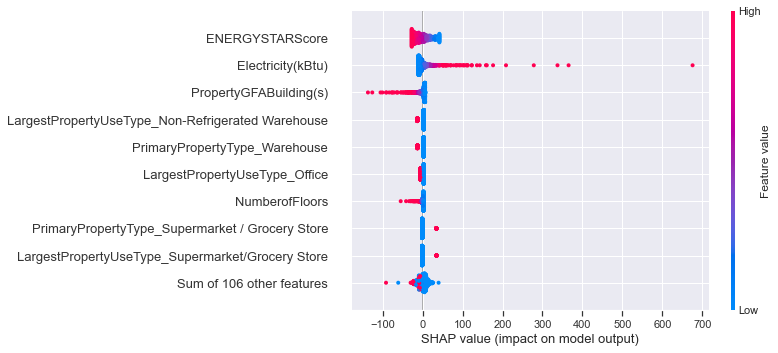

In [33]:
shap.plots.beeswarm(shap_values)
#shap.summary_plot(shap_values)

'ENERGYSTARScore' joue effectivement le rôle le plus important parmi les indicateurs du dataset (2è preuve).

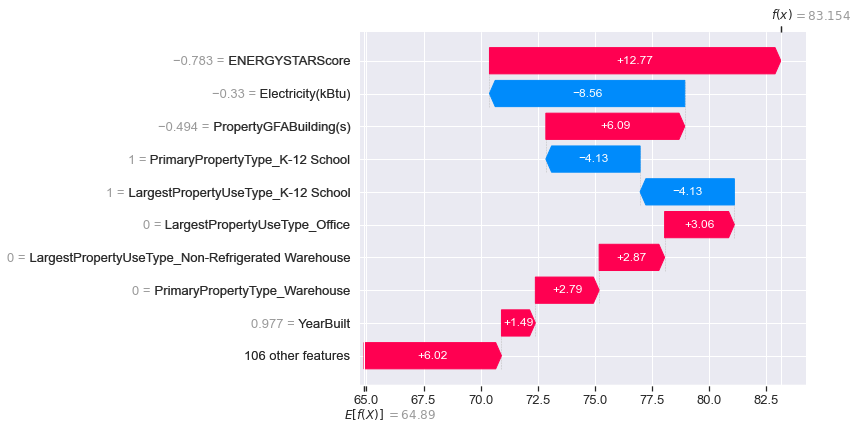

In [34]:
shap.plots.waterfall(shap_values[0])

>>-
## 3.3. Performance du best_estimator_ SANS la feature ENERGYSTARScore.

In [35]:
drops = ['SiteEUIWN(kBtu/sf)','ENERGYSTARScore','GHGEmissionsIntensity']

In [36]:
cols_num = []
with open("cols_num.txt", "r") as f:
    for line in f:
        cols_num.append(line.strip())

In [37]:
X = df.drop(drops, axis=1)
for i in drops:
    cols_num.remove(i)
y = df[target1]
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.2, random_state=5)

In [38]:
model = pipeline_t(mb00, mb01, mb1)

In [39]:
model.fit(Xtr, ytr)
ypred = model.predict(Xts)
r2_0, mae_0, mse_0 = r2_score(yts, ypred), mean_absolute_error(yts, ypred), mean_squared_error(yts, ypred)

In [40]:
r2_0, mae_0, mse_0

(0.3537068825302957, 29.24779478711691, 3550.4460895616785)

In [41]:
r2_E-r2_0, mae_E-mae_0, mse_E-mse_0

(0.05465912749765389, -5.119671419303817, -300.27286418069525)

'ENERGYSTARScore' joue effectivement un rôle non-négligeable dans le résultat de la régression (3è preuve).

>-
# 4. Nettoyages supplémentaires pour améliorer les scores de régression

>>-
## 4.1. Passage au log

skewness pour log de certaines features dans la pipeline  

In [42]:
cols_num = []
with open("cols_num.txt", "r") as f:
    for line in f:
        cols_num.append(line.strip())

In [43]:
df10 = pd.DataFrame(columns = ['indicateur','skewness'])
cols_num_log = []
for co in cols_num:
    sk = df[co].skew()
    df10.loc[co] = [co, sk]
    if sk > 1:
        cols_num_log.append(co)
display(df10)
cols_num_lin = list(set(cols_num).difference(set(cols_num_log)))

,indicateur,skewness
NumberofFloors,NumberofFloors,5.106580
SteamUse(kBtu),SteamUse(kBtu),18.518288
PropertyGFABuilding(s),PropertyGFABuilding(s),4.667818
SiteEUIWN(kBtu/sf),SiteEUIWN(kBtu/sf),4.685968
PropertyGFAParking,PropertyGFAParking,4.912275
Longitude,Longitude,0.030541
GHGEmissionsIntensity,GHGEmissionsIntensity,6.380721
Latitude,Latitude,0.174232
Electricity(kBtu),Electricity(kBtu),9.139249
ENERGYSTARScore,ENERGYSTARScore,-0.775344


In [44]:
cols_num_log = list(set(cols_num).difference(set(['Longitude','Latitude','YearBuilt','ENERGYSTARScore'])))
df10 = df.copy()
for co in cols_num_log:
    df10[co] = np.log(df10[co]+1)/np.log(2) # Je mets +1 pour éviter les valeurs <0 et surtout -inf (qui fausse les boxplot et bug avec ).
                                  # Je me permets ce +1 car toutes les cols_num_log ont des valeurs qui évoluent dans une range bien plus "haute" que [0,1].
df10.to_csv('df10.csv')

In [45]:
df = df10.copy()

In [46]:
df10sk = pd.DataFrame(columns = ['indicateur','skewness'])
cols_num_sk = []
for co in cols_num:
    sk = df[co].skew()
    df10sk.loc[co] = [co, sk]
display(df10sk)

,indicateur,skewness
NumberofFloors,NumberofFloors,1.222773
SteamUse(kBtu),SteamUse(kBtu),3.485820
PropertyGFABuilding(s),PropertyGFABuilding(s),0.963639
SiteEUIWN(kBtu/sf),SiteEUIWN(kBtu/sf),-0.835211
PropertyGFAParking,PropertyGFAParking,1.360725
Longitude,Longitude,0.030541
GHGEmissionsIntensity,GHGEmissionsIntensity,1.213944
Latitude,Latitude,0.174232
Electricity(kBtu),Electricity(kBtu),-1.332960
ENERGYSTARScore,ENERGYSTARScore,-0.775344


>>-
## 4.2. Suppression d'outliers
(Je n'en avais supprimé aucun.)

In [47]:
df11_out = pd.DataFrame(columns = ['indicateur','# outliers bas','# outliers hauts'])
cols_num_not_out = ['NumberofFloors','NumberofBuildings','SteamUse(kBtu)','PropertyGFAParking'] # Je ne peux pas supprimer leurs outliers car si je le fais je me retrouve avec une seule valeur unique restante pour ces indicateurs.
cols_num_out = list(set(cols_num).difference(set(cols_num_not_out)))
for co in cols_num_out:
    Q1 = df[co].quantile(.25)
    Q3 = df[co].quantile(.75)
    QQ = 1.5*(Q3 - Q1)
    Qm = Q1 - QQ
    QM = Q3 + QQ
    n_out = sum(df[co] < Qm)
    N_out = sum(df[co] > QM)
    df11_out.loc[co] = [co, n_out, N_out]
    df = df[~((df[co] > QM) | (df[co] < Qm))]
display(df11_out)
df = my.resindx(df)
df.to_csv('df11.csv')
df11 = df.copy()

,indicateur,# outliers bas,# outliers hauts
YearBuilt,YearBuilt,0,0
Electricity(kBtu),Electricity(kBtu),4,5
GHGEmissionsIntensity,GHGEmissionsIntensity,0,24
ENERGYSTARScore,ENERGYSTARScore,0,0
Longitude,Longitude,74,67
SiteEUIWN(kBtu/sf),SiteEUIWN(kBtu/sf),47,18
NaturalGas(kBtu),NaturalGas(kBtu),0,0
Latitude,Latitude,20,33
PropertyGFABuilding(s),PropertyGFABuilding(s),0,11


Il n'y avait pas de colonne 'level_0' indésirable à supprimer.
Une colonne 'index' indésirable a été supprimée.
(791, 19)


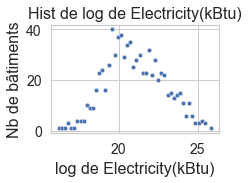

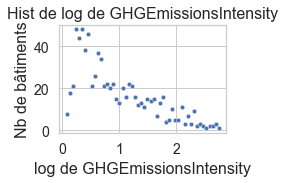

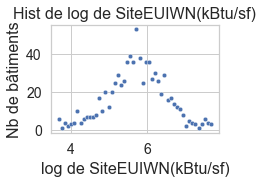

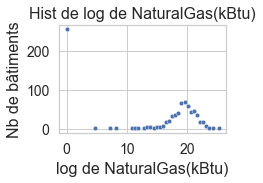

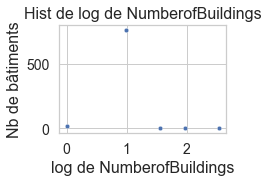

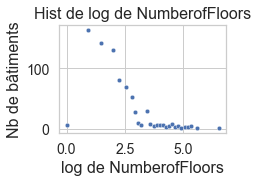

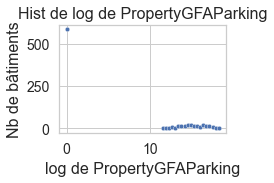

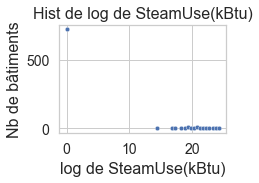

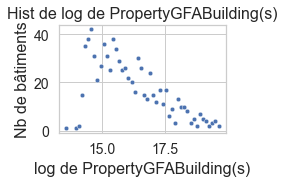

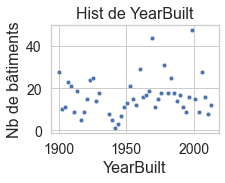

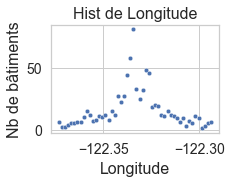

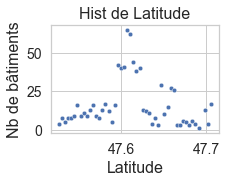

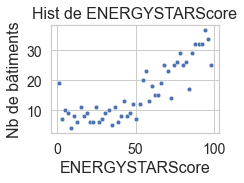

In [48]:
warnings.filterwarnings('ignore')
for co in cols_num_log:
    plt.figure(figsize=(3, 2))
    my.hstplot(df[co], strlog='log de ')
for co in cols_num_lin:
    plt.figure(figsize=(3, 2))
    my.hstplot(df[co], strlog='')
print()

In [49]:
from sklearn.preprocessing import MinMaxScaler

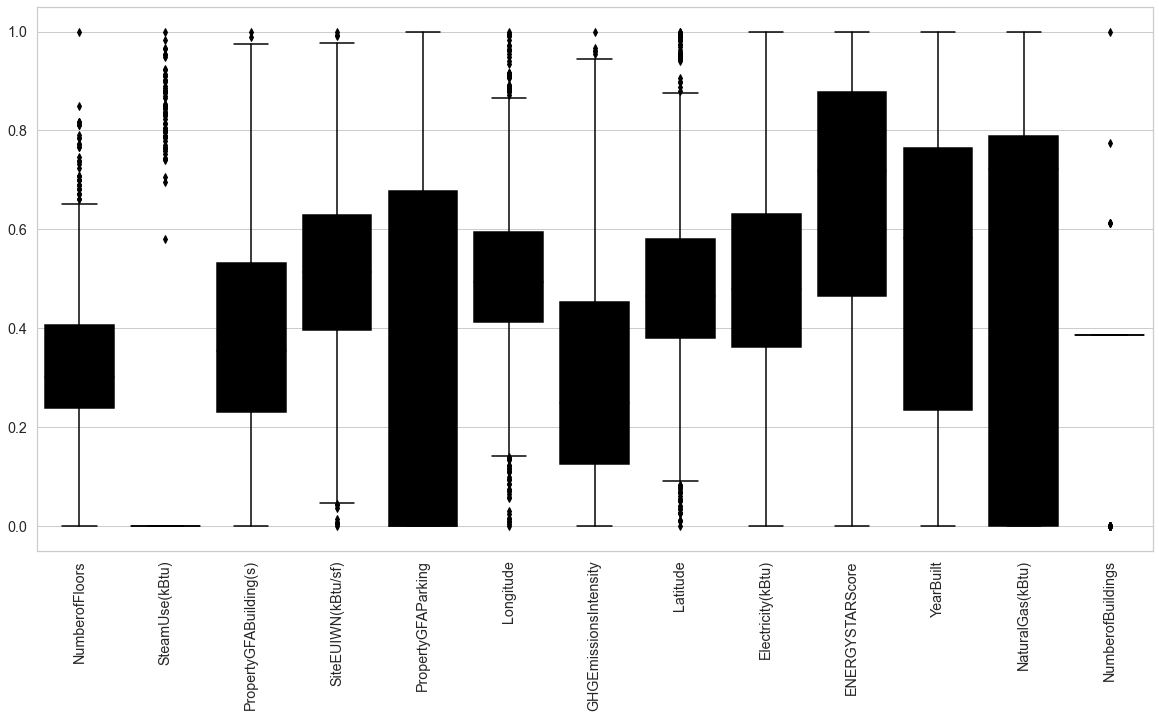

In [50]:
scal = MinMaxScaler()
dfbox = pd.DataFrame(scal.fit_transform(df[cols_num]), index = df.index, columns = cols_num)
plt.figure(figsize=(20, 10))
with sns.axes_style("whitegrid"):
    sns.boxplot(data=dfbox, color='black')
plt.xticks(rotation=90)
print('')

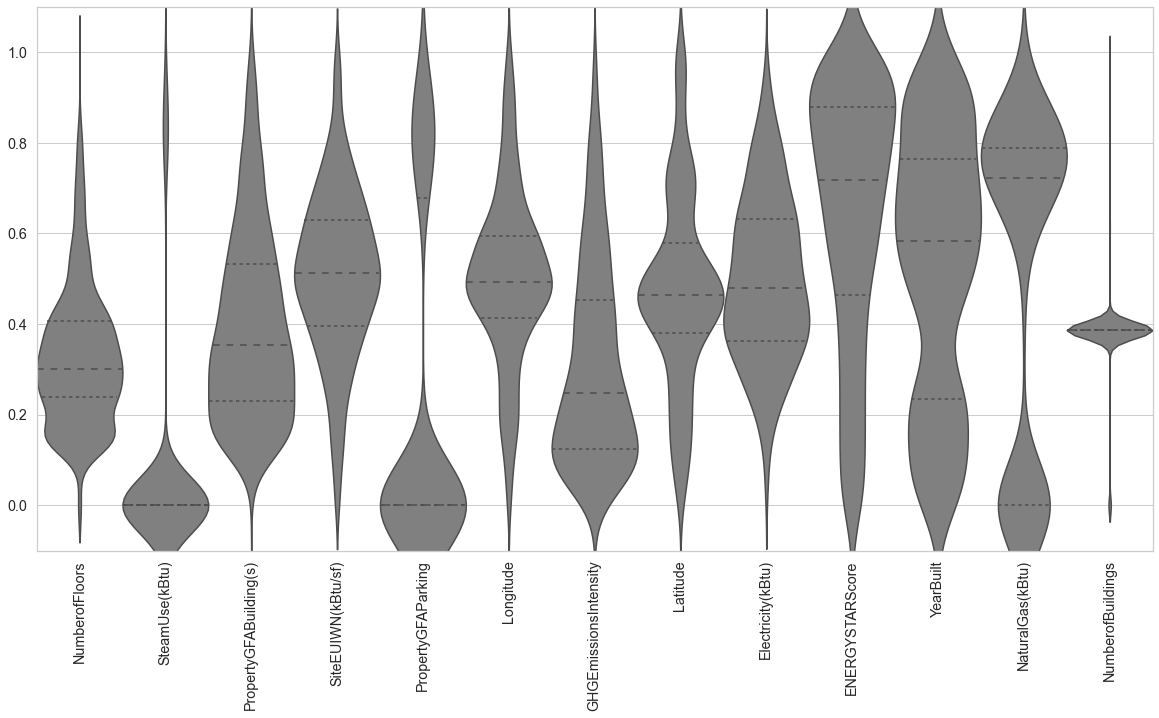

In [51]:
plt.figure(figsize=(20, 10))
with sns.axes_style("whitegrid"):
    sns.violinplot(data=dfbox, color='gray', scale='width', width=1, inner='quartiles')
plt.ylim(-.1,1.1)
plt.xticks(rotation=90)
print('')

>>-
## 4.3. Nouvelle recherche du meilleur estimateur, cette fois en gardant l'ENERGYSTARScore car c'est notre feature la plus importante.

In [52]:
%%script echo Ça ça sert juste à relancer en cas de mauvaise manip.
df = df11.copy()
cols_num = []
with open("cols_num.txt", "r") as f:
    for line in f:
        cols_num.append(line.strip())

Couldn't find program: 'echo'


In [53]:
drops = ['SiteEUIWN(kBtu/sf)','GHGEmissionsIntensity']
X = df.drop(drops, axis=1)
for i in drops:
    cols_num.remove(i)
y = df[target1]
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.2, random_state=5)

,Encoder,Scaler,Estimator,best score,r2,mae,msqe,time,best_params,best_estimator
0,OrdinalEncoder(handle_unknown='use_encoded_val...,RobustScaler(),Ridge(),6.736337e-01,5.498805e-01,3.836100e-01,2.421748e-01,0.064335,{'ridge__alpha': 1},"(ColumnTransformer(transformers=[('num',\n ..."
1,OrdinalEncoder(handle_unknown='use_encoded_val...,RobustScaler(),Lasso(),3.712609e-01,3.449105e-01,4.454553e-01,3.524534e-01,0.061114,{'lasso__alpha': 0.1},"(ColumnTransformer(transformers=[('num',\n ..."
2,OrdinalEncoder(handle_unknown='use_encoded_val...,RobustScaler(),DummyRegressor(),-8.141541e-03,-2.653162e-06,5.522688e-01,5.380247e-01,0.065962,{'dummyregressor__strategy': 'mean'},"(ColumnTransformer(transformers=[('num',\n ..."
3,OrdinalEncoder(handle_unknown='use_encoded_val...,RobustScaler(),LinearRegression(),6.730596e-01,5.478529e-01,3.845479e-01,2.432657e-01,0.075337,{'linearregression__fit_intercept': True},"(ColumnTransformer(transformers=[('num',\n ..."
4,OrdinalEncoder(handle_unknown='use_encoded_val...,RobustScaler(),ElasticNetCV(),6.740061e-01,5.525546e-01,3.816716e-01,2.407360e-01,0.181030,"{'elasticnetcv__l1_ratio': 0.3, 'elasticnetcv_...","(ColumnTransformer(transformers=[('num',\n ..."
5,OrdinalEncoder(handle_unknown='use_encoded_val...,StandardScaler(),Ridge(),6.733549e-01,5.502018e-01,3.837210e-01,2.420019e-01,0.060159,{'ridge__alpha': 3},"(ColumnTransformer(transformers=[('num',\n ..."
6,OrdinalEncoder(handle_unknown='use_encoded_val...,StandardScaler(),Lasso(),4.325741e-01,3.964315e-01,4.297481e-01,3.247339e-01,0.059156,{'lasso__alpha': 0.1},"(ColumnTransformer(transformers=[('num',\n ..."
7,OrdinalEncoder(handle_unknown='use_encoded_val...,StandardScaler(),DummyRegressor(),-8.141541e-03,-2.653162e-06,5.522688e-01,5.380247e-01,0.059392,{'dummyregressor__strategy': 'mean'},"(ColumnTransformer(transformers=[('num',\n ..."
8,OrdinalEncoder(handle_unknown='use_encoded_val...,StandardScaler(),LinearRegression(),6.730596e-01,5.478529e-01,3.845479e-01,2.432657e-01,0.068832,{'linearregression__fit_intercept': True},"(ColumnTransformer(transformers=[('num',\n ..."
9,OrdinalEncoder(handle_unknown='use_encoded_val...,StandardScaler(),ElasticNetCV(),6.748638e-01,5.530424e-01,3.815535e-01,2.404736e-01,0.191300,"{'elasticnetcv__l1_ratio': 1, 'elasticnetcv__n...","(ColumnTransformer(transformers=[('num',\n ..."


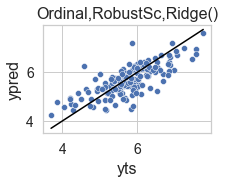

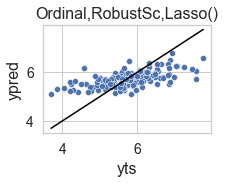

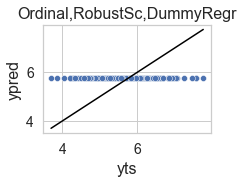

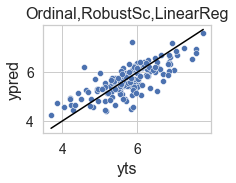

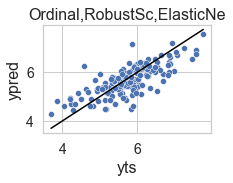

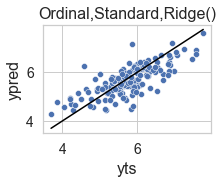

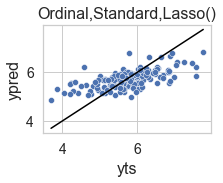

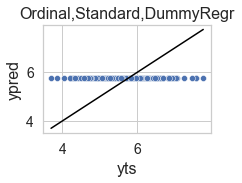

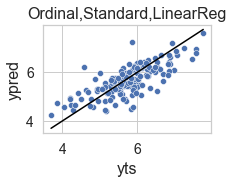

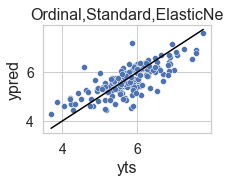

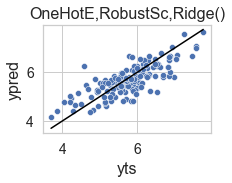

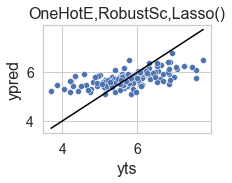

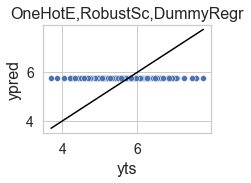

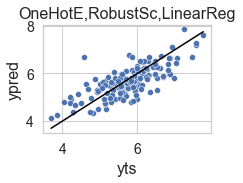

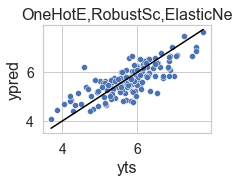

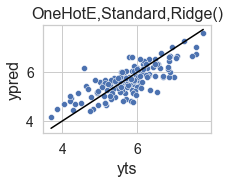

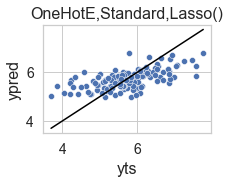

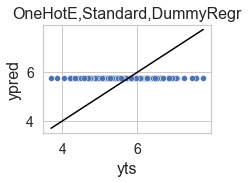

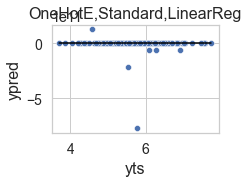

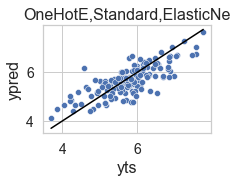

In [54]:
warnings.filterwarnings('ignore')
dfscores2 = pd.DataFrame(columns=['Encoder','Scaler','Estimator','best score','r2','mae','msqe','time','best_params','best_estimator'])
m = 0
for i in encoders:
    for j in scalers:
        for k_index, k in enumerate(estimators):
            start_time = timeit.default_timer()
            model = pipeline_t(i, j, k)
            grid = GridSearchCV(model, param_grid=params[k_index], cv=5, scoring='r2')
            grid.fit(Xtr, ytr)
            ypred = grid.predict(Xts)
            time_passed = timeit.default_timer() - start_time
            cell_pn = dfpar.loc[k_index, 'param_nums']
            param_loops = math.prod([len(cell_pn[i]) for i in range(len(cell_pn))])
            time_1 = time_passed/(param_loops)
            dfscores2.loc[m] = [i, j, k, grid.best_score_, r2_score(yts, ypred), mean_absolute_error(yts, ypred), mean_squared_error(yts, ypred), time_1, grid.best_params_, grid.best_estimator_]
            clear_output()
            print(str(100*m/(len(encoders)*len(scalers)*len(estimators))) + '%')
            m += 1
            plt.figure(figsize=(3, 2))
            with sns.axes_style("whitegrid"):
                sns.scatterplot(yts, ypred, legend=None)
                plt.plot([min(yts), max(yts)], [min(yts), max(yts)], color="black")
            plt.title((str(i)[:7] + "," + str(j)[:8] + "," + str(k)[:9]),fontsize=16)
            plt.xlabel(("yts"),fontsize=16)
            plt.xticks(fontsize=14)
            plt.ylabel("ypred",fontsize=16)
            plt.yticks(fontsize=14)
            plt.legend
clear_output()
display(dfscores2)

In [55]:
index_1 = dfscores2[dfscores2['best score'] == dfscores2['best score'].max()].index[0]
model_best = dfscores2.loc[index_1,'best_estimator']
model_best

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['NumberofFloors',
                                                   'SteamUse(kBtu)',
                                                   'PropertyGFABuilding(s)',
                                                   'PropertyGFAParking',
                                                   'Longitude', 'Latitude',
                                                   'Electricity(kBtu)',
                                                   'ENERGYSTARScore',
                                                   'YearBuilt',
                                                   'NaturalGas(kBtu)',
                                                   'NumberofBuildings']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['BuildingType',
                                                   'PrimaryPropertyType',
                                                   'ZipCode',
                                                   'CouncilDistrictCode',
                                                   'Neighborhood',
                                                   'LargestPropertyUseType'])])),
                ('elasticnetcv', ElasticNetCV(l1_ratio=0.1))])

In [56]:
col_score = ['best score','r2','mae','msqe','time']
print(dfscores2[col_score] - dfscores[col_score])

      best score            r2           mae          msqe      time
0   5.456720e-01  2.220879e+00 -4.266704e+01 -1.303612e+04 -0.009930
1   8.160592e-02  1.537467e+00 -4.227454e+01 -1.070087e+04 -0.012977
2  -6.066227e-03  4.737353e-04 -4.491818e+01 -4.882494e+03 -0.022371
3   5.547913e-01  2.221856e+00 -4.267244e+01 -1.305078e+04 -0.018669
4   6.804202e-01  5.530310e-01 -4.508878e+01 -4.882791e+03 -0.009507
5   4.792426e-01  2.145800e+00 -4.280415e+01 -1.266811e+04 -0.006643
6   1.145930e-01  1.500613e+00 -4.290424e+01 -1.026957e+04 -0.008456
7  -6.066227e-03  4.737353e-04 -4.491818e+01 -4.882494e+03 -0.017638
8   5.547913e-01  2.221856e+00 -4.267244e+01 -1.305078e+04 -0.014566
9   4.166824e-01  1.184612e+00 -4.372403e+01 -7.962973e+03  0.007969
10  3.687495e-01  1.586630e+00 -3.548185e+01 -9.727851e+03 -0.010610
11  7.058239e-02  1.242558e+00 -3.474470e+01 -9.289214e+03 -0.034424
12 -6.066227e-03  4.737353e-04 -4.491818e+01 -4.882494e+03 -0.007806
13  6.896160e-01  1.718063e+00 -3.

Je trouve de nouveau que la meilleure pipeline est StandardScaler + OHE + ElasticNetCV.  
J'ai grandement amélioré la performance des prédictions avec ces étapes de nettoyage supplémentaires (sauf pour les DummyRegressor).

Permutation explainer: 633it [00:14, 13.33it/s]                         


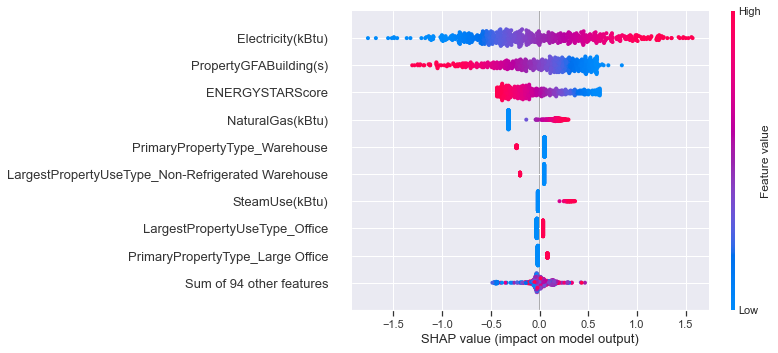

In [57]:
mb00 = model_best.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder']
mb01 = model_best.named_steps['preprocessor'].transformers_[0][1].named_steps['scaler']
mb1 = model_best[1]
model = pipeline_t(mb00, mb01, mb1)
model.fit(Xtr, ytr)
cols_cat_ohe = model.named_steps['preprocessor'].transformers_[1][1]\
                    .named_steps['encoder'].get_feature_names(cols_cat)
feature_names_2 = np.concatenate((cols_num, cols_cat_ohe),axis=0)
X_mod = model[0].fit_transform(Xtr, ytr)
X_mod = pd.DataFrame(X_mod, index=Xtr.index, columns=feature_names_2)
explainer = shap.Explainer(model[1].predict, X_mod)
shap_values = explainer(X_mod)
shap.plots.beeswarm(shap_values)
#shap.summary_plot(shap_values)

In [58]:
r=

SyntaxError: invalid syntax (2666259821.py, line 1)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
nrgies = ['SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)']
chi2(abs(df[cols_num]), df[nrgies].sum())